In [2]:
import torch
import time 

import torchvision as tv 
import matplotlib.pyplot as plt

In [3]:
#loading dataset
BATCH_SIZE = 256 

train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

train = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size = BATCH_SIZE)

In [9]:
def train_model():
    for ep in range(num_epochs + 1):
        train_iters, train_passed = 0, 0
        train_loss, train_acc = 0., 0. 
        start = time.time()
        
        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(axis=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed = 0, 0
        test_loss, test_acc = 0., 0. 
        model.eval()
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(axis=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
        
        print('ep: {}, taked: {:.3f}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}'.format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed, 
        test_loss / test_iters, test_acc / test_passed)
             )
            

## Model 

torch.Size([1, 28, 28])


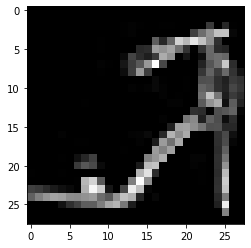

In [35]:
for X, y in train:
    print(X[1].shape)
    plt.imshow(X[8][0], cmap="gray")
    break

In [116]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=3, padding=1),
    torch.nn.BatchNorm2d(6),
    torch.nn.ReLU(), 
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(6, 12, kernel_size=3),
    torch.nn.BatchNorm2d(12),
    torch.nn.ReLU(), 
    torch.nn.MaxPool2d(2),
    torch.nn.Flatten(),
    torch.nn.Linear(432, 600),
    torch.nn.Dropout(0.3),
    torch.nn.ReLU(),
    torch.nn.Linear(600, 120),
    torch.nn.ReLU(),
    torch.nn.Linear(120, 10),
    torch.nn.ReLU()
)

loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.003)
# trainer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.8)
num_epochs = 10

train_model()

ep: 0, taked: 15.376, train_loss: 0.6467841805295741, train_acc: 0.7990666666666667, test_loss: 0.3830020673573017, test_acc: 0.8607
ep: 1, taked: 15.192, train_loss: 0.3234043596272773, train_acc: 0.8823666666666666, test_loss: 0.30160607062280176, test_acc: 0.8895
ep: 2, taked: 15.195, train_loss: 0.2831650092246685, train_acc: 0.8952666666666667, test_loss: 0.30461221672594546, test_acc: 0.8885
ep: 3, taked: 15.423, train_loss: 0.25941367181057623, train_acc: 0.90435, test_loss: 0.31897776424884794, test_acc: 0.8825
ep: 4, taked: 15.301, train_loss: 0.24000495260066174, train_acc: 0.9118333333333334, test_loss: 0.28674472495913506, test_acc: 0.8968
ep: 5, taked: 15.254, train_loss: 0.22424109229382047, train_acc: 0.9163166666666667, test_loss: 0.35047541595995424, test_acc: 0.878
ep: 6, taked: 15.235, train_loss: 0.20968918429410205, train_acc: 0.9220833333333334, test_loss: 0.2999252062290907, test_acc: 0.895
ep: 7, taked: 15.619, train_loss: 0.196682071844314, train_acc: 0.9250333